# NSGA-II

In [1]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import pandas as pd

# import algorithms.nsga2 as nsga2

sift_results = pd.read_csv('result-small-pop-scaling.csv')
sift_results

generation              method  max_deg  size_construction  size_search   
0             0  single-cutcat-unif      273                961          413  \
1             0  single-cutcat-unif      629                949          408   
2             0  single-cutcat-unif      426                227          387   
3             0  single-cutcat-unif      356                391          342   
4             0  single-cutcat-unif      607                635         1000   
..          ...                 ...      ...                ...          ...   
307          10   multi-cutcat-tour       14                626          152   
308          10   multi-cutcat-tour        2                368          200   
309          10   multi-cutcat-tour      326                880          211   
310          10   multi-cutcat-tour       26                880          200   
311          10   multi-cutcat-tour        3                368          280   

        alpha  build_time  memory  search_time  recall  
0    1.560547    0.446528       0     0.325267  1.0000  
1    1.918945    1.000000       0     0.483276  1.0000  
2    1.568359    0.088700       0     0.183798  1.0000  
3    1.769531    0.433575       0     0.256001  1.0000  
4    1.828125    0.720085       0     0.987208  1.0000  
..        ...         ...     ...          ...     ...  
307  1.949219    0.136204       0     0.077813  0.9972  
308  1.607422    0.005052       0     0.002975  0.0246  
309  1.063477    0.117700       0     0.142499  1.0000  
310  1.101562    0.125687       0     0.097639  0.9997  
311  1.094727    0.046029       0     0.045702  0.4556  

[312 rows x 10 columns]

In [2]:
# plt.figure(figsize=(10, 10))
# axes = plt.axes(projection='3d')
# axes.scatter3D(sift_results['build_time'], sift_results['search_time'], sift_results['recall'])
# axes.scatter3D([0.0], [0.0], [1.0], c='r')
# axes.set_xlabel('build_time')
# axes.set_ylabel('search_time')
# axes.set_zlabel('recall')
# axes.view_init(elev=15, azim=225)
# plt.savefig('./images/m3/3d-bsr.png')
# plt.show()

In [3]:
# def distance_from_perfection(data_point: np.ndarray):
#     build_time = data_point[5]
#     search_time = data_point[7]
#     recall = data_point[8]

#     total_weight = np.array([1, 2, 3])
#     squared_error = np.array([build_time ** 2, search_time ** 2, (recall - 1) ** 2])
#     return squared_error @ total_weight

# # sift_results.to_numpy()

In [4]:
# sorted_res = sorted(sift_results.to_numpy(), key=distance_from_perfection)
# top10 = pd.DataFrame(sorted_res[:10], columns=sift_results.columns).drop("memory", axis=1)
# top10["WS"] = [distance_from_perfection(e) for e in sorted_res[:10]]
# top10

In [5]:
# plt.figure(figsize=(10, 10))
# axes = plt.axes(projection='3d')

# # sift_results = sift_results.groupby("generation").mean()
# axes.scatter3D(sift_results['build_time'], sift_results['search_time'], sift_results['recall'])
# axes.scatter3D([0.0], [0.0], [1.0], c='r')
# axes.scatter3D(top10['build_time'], top10['search_time'], top10['recall'], c="orange")

# axes.set_xlabel('build_time')
# axes.set_ylabel('search_time')
# axes.set_zlabel('recall')
# axes.view_init(elev=15, azim=225)
# plt.savefig('./images/m3/3d-top10.png')
# plt.legend()
# plt.show()

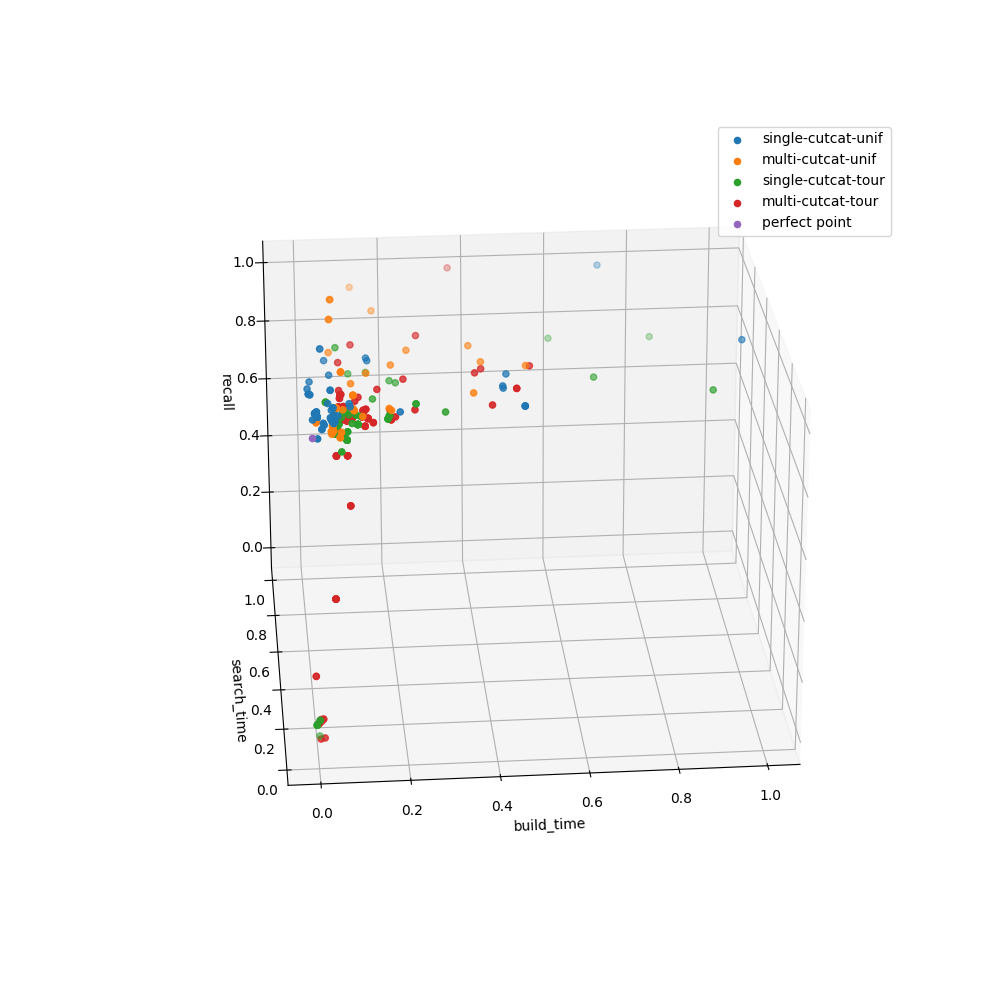

In [6]:
plt.figure(figsize=(10, 10))
axes = plt.axes(projection='3d')

methods = [
    "single-cutcat-unif",
    "multi-cutcat-unif",
    "single-cutcat-tour",
    "multi-cutcat-tour"
]

for method in methods:
    to_use = sift_results[sift_results["method"] == method]
    axes.scatter3D(to_use['build_time'], to_use['search_time'], to_use['recall'], label=method)
axes.scatter3D([0.0], [0.0], [1.0], label="perfect point")

axes.set_xlabel('build_time')
axes.set_ylabel('search_time')
axes.set_zlabel('recall')
axes.view_init(elev=24, azim=-95)
plt.legend()

plt.savefig('./images/m3/all-methods1-normalized.png')

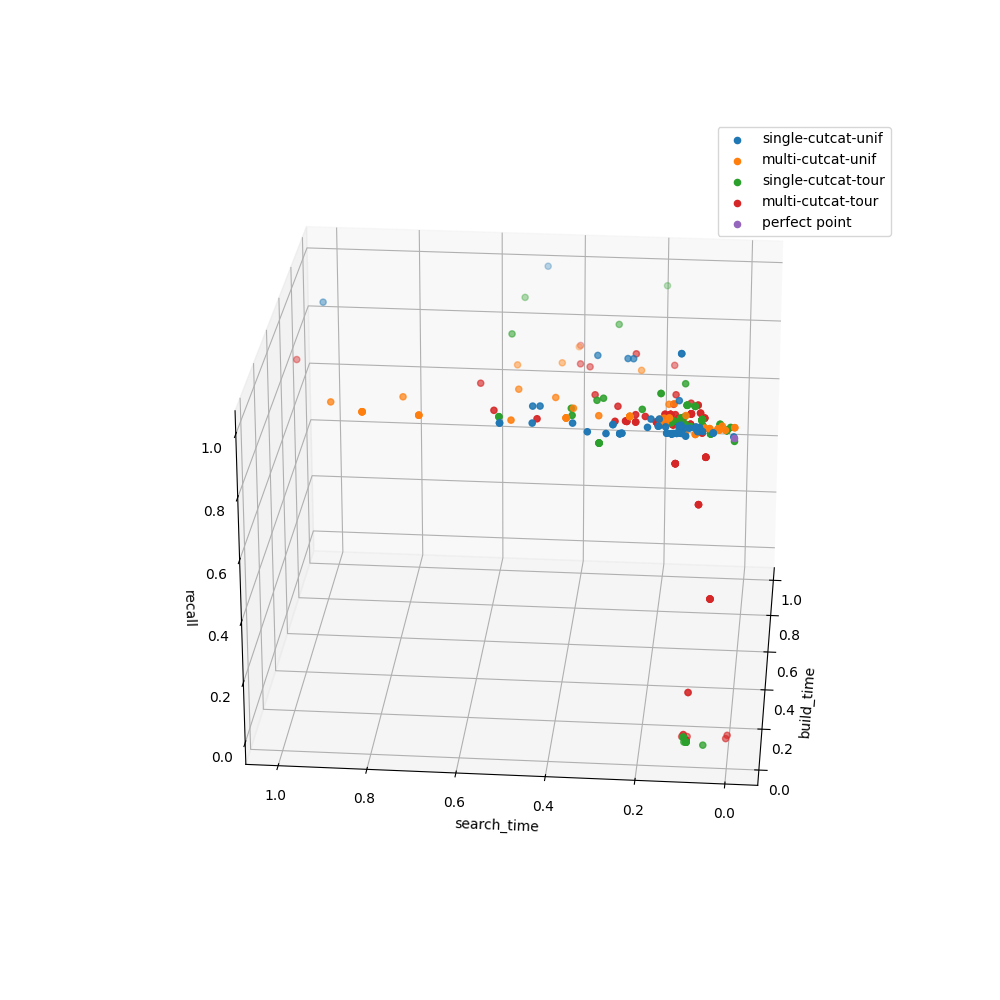

In [7]:
axes = plt.axes(projection='3d')

for method in methods:
    to_use = sift_results[sift_results["method"] == method]
    axes.scatter3D(to_use['build_time'], to_use['search_time'], to_use['recall'], label=method)
axes.scatter3D([0.0], [0.0], [1.0], label="perfect point")

axes.set_xlabel('build_time')
axes.set_ylabel('search_time')
axes.set_zlabel('recall')
axes.view_init(elev=24, azim=-175)

plt.legend()
plt.show()

plt.savefig('./images/m3/all-methods2-normalized.png')

# Weighted Sum with BO

In [8]:
sift_results = pd.read_csv('bo-small-123.csv').set_index("iter")
sift_results

M     C    S     alpha        ws
iter                                    
0      60   664  233  1.062043  3.000000
1     445   439  967  1.807759  3.000000
2     527   858  909  1.171586  0.954859
3     583   585  750  1.103427  1.658791
4     652   394  147  1.088090  0.312912
...   ...   ...  ...       ...       ...
105    10  1003  168  1.526575  0.148283
106   209   747  501  1.405516  0.666858
107    58   840  151  1.212243  0.315536
108   518   188  834  1.224786  0.712293
109   230   299  112  1.320024  0.208112

[110 rows x 5 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


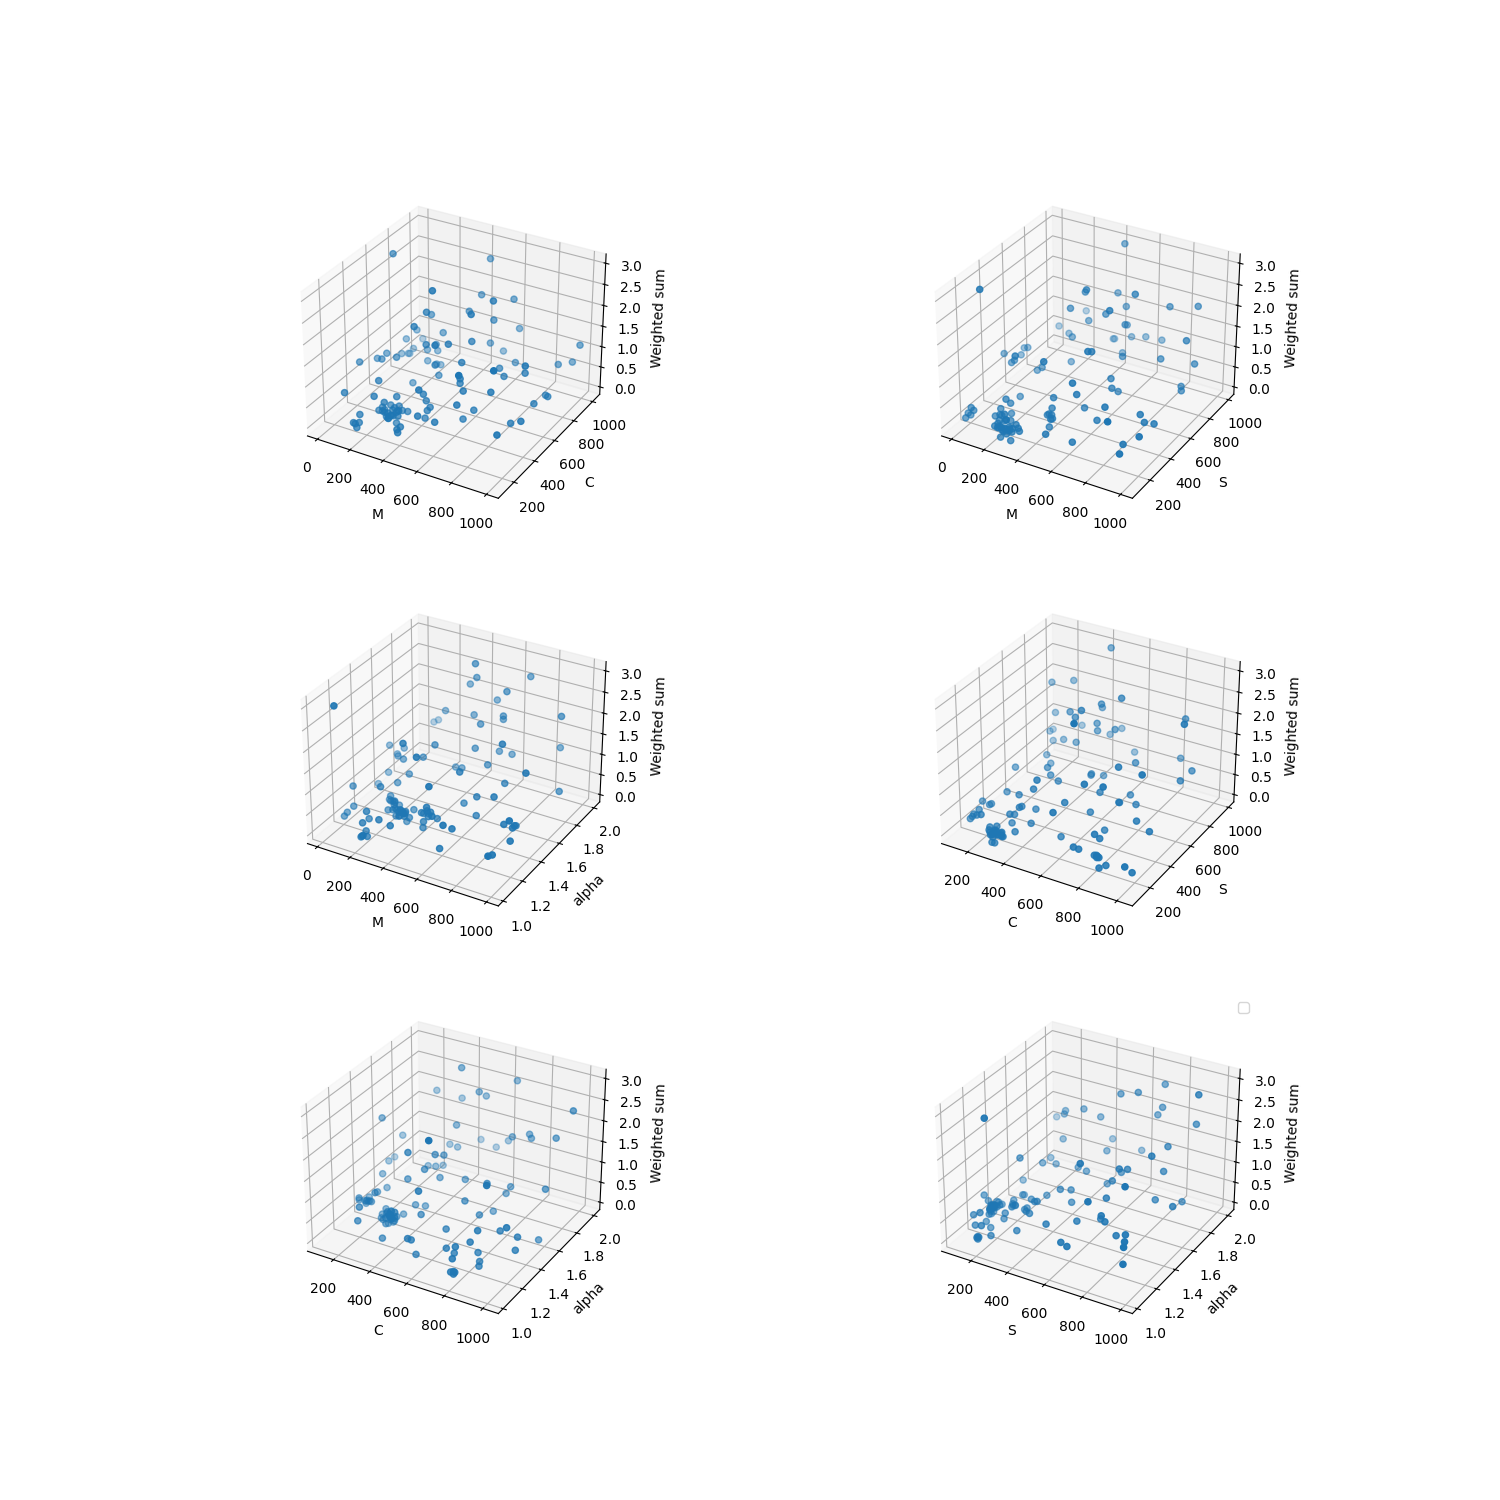

In [9]:
fig = plt.figure(figsize=(15, 15))

combs = [("M", "C"), ("M", "S"), ("M", "alpha"), ("C", "S"), ("C", "alpha"), ("S", "alpha")]
for i, com in enumerate(combs):
    c1, c2 = com
    axes = fig.add_subplot(3, 2, i+1, projection='3d')
    axes.scatter3D(sift_results[c1], sift_results[c2], sift_results["ws"])
    axes.set_xlabel(c1)
    axes.set_ylabel(c2)
    axes.set_zlabel('Weighted sum')

plt.legend()
plt.show()

plt.savefig('./images/report/ws-bo-123.png')

In [10]:
sift_results.sort_values(by="ws")[:10]

M     C    S     alpha        ws
iter                                    
14    317   295  100  1.317501  0.031633
15    256   310  100  1.338836  0.037280
59     19   862  177  1.180139  0.091437
89     18   850  135  1.209618  0.119993
105    10  1003  168  1.526575  0.148283
88    218   805  193  1.032512  0.159487
37    267   280  112  1.292019  0.160982
19    293   301  100  1.330278  0.164046
92    195   124  179  1.396043  0.179241
28    226   808  194  1.039740  0.189204

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


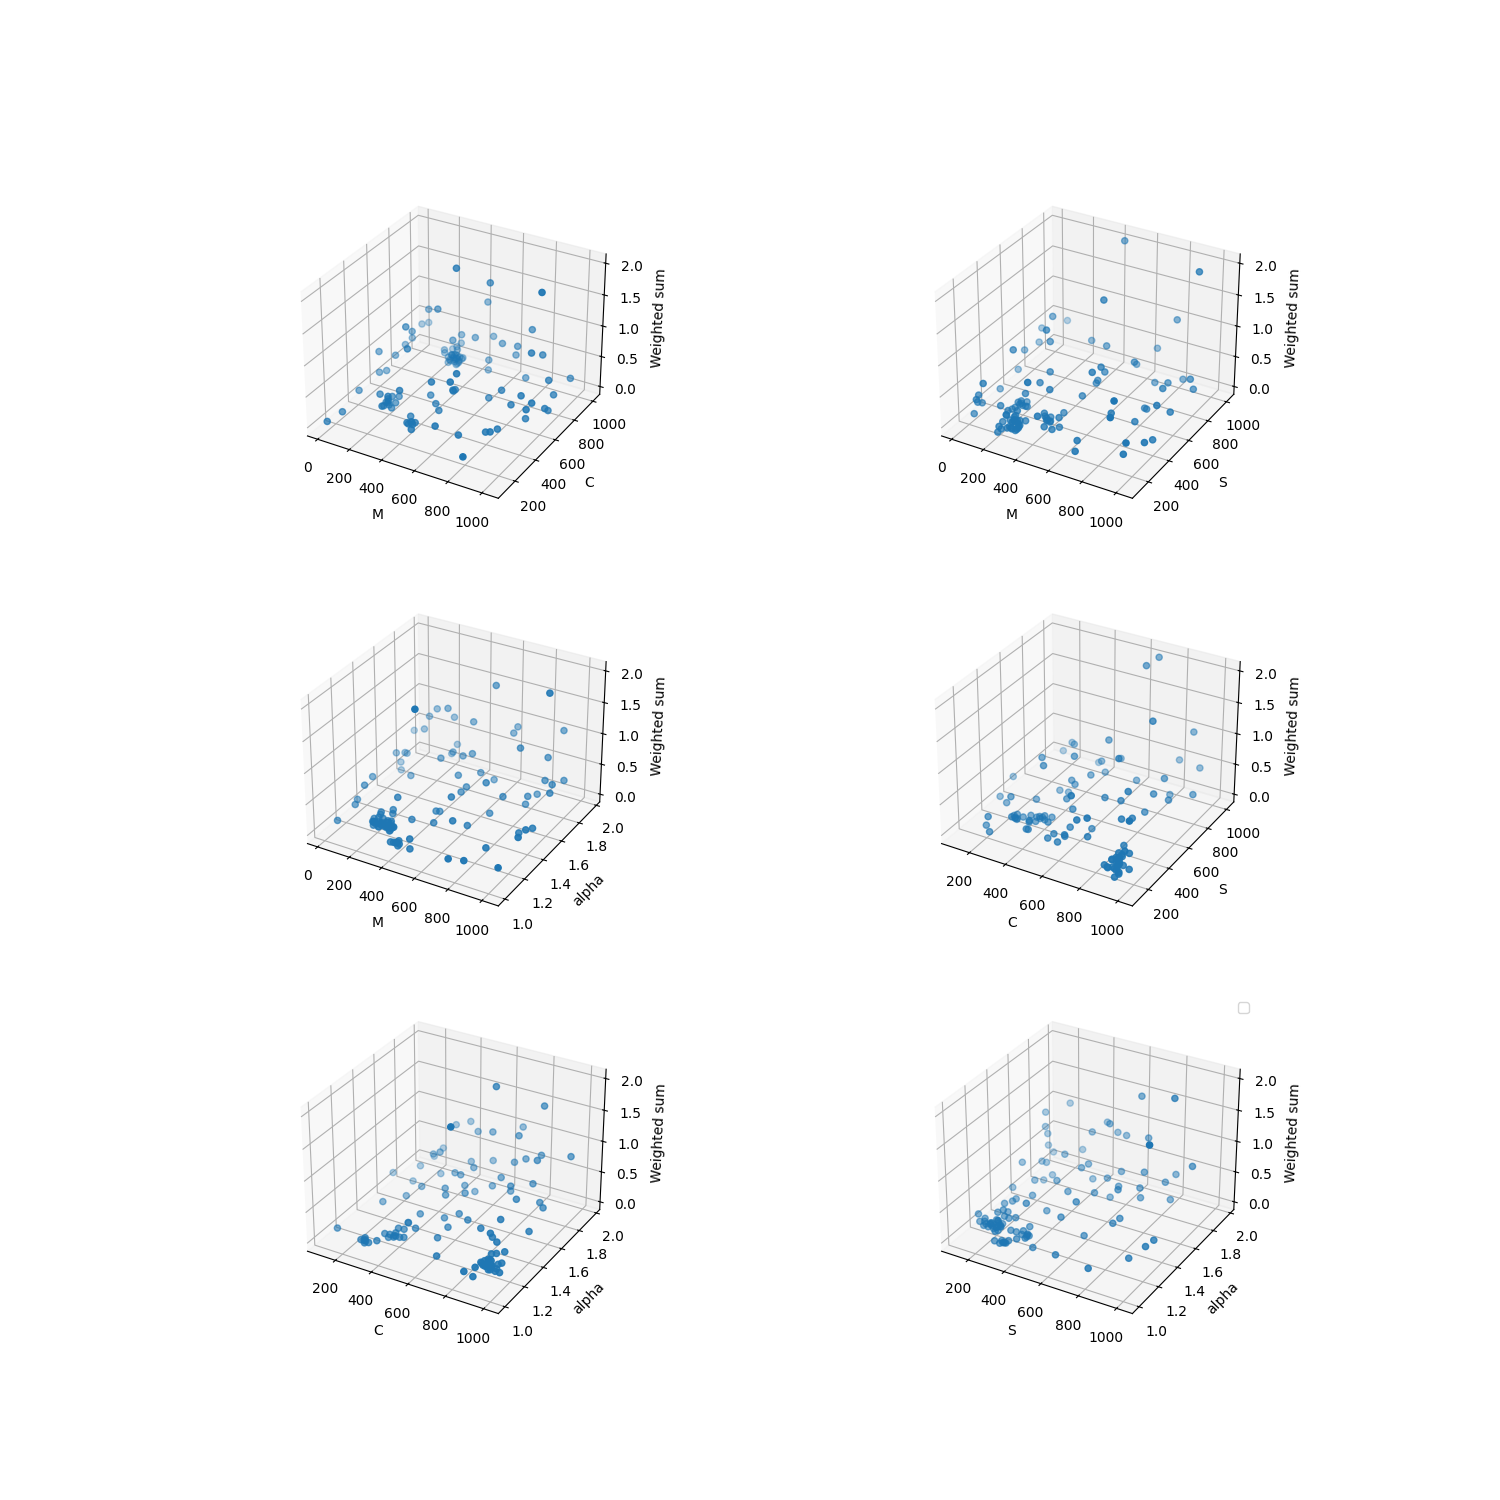

M    C    S     alpha        ws
iter                                   
10    294  899  225  1.173432  0.014431
11    295  908  198  1.176635  0.018637
28    209  385  386  1.173622  0.059893
66     13  111  461  1.102408  0.062545
52    422  290  331  1.069600  0.063003
32    238  366  387  1.157287  0.063207
22    237  945  156  1.154125  0.064826
20    263  892  192  1.171215  0.065713
9     277  929  227  1.214441  0.067455
27    231  413  383  1.183549  0.068332

In [11]:
sift_results = pd.read_csv('bo-small-111.csv').set_index("iter")
fig = plt.figure(figsize=(15, 15))

combs = [("M", "C"), ("M", "S"), ("M", "alpha"), ("C", "S"), ("C", "alpha"), ("S", "alpha")]
for i, com in enumerate(combs):
    c1, c2 = com
    axes = fig.add_subplot(3, 2, i+1, projection='3d')
    axes.scatter3D(sift_results[c1], sift_results[c2], sift_results["ws"])
    axes.set_xlabel(c1)
    axes.set_ylabel(c2)
    axes.set_zlabel('Weighted sum')

plt.legend()
plt.show()

plt.savefig('./images/report/ws-bo-111.png')

sift_results.sort_values(by="ws")[:10]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


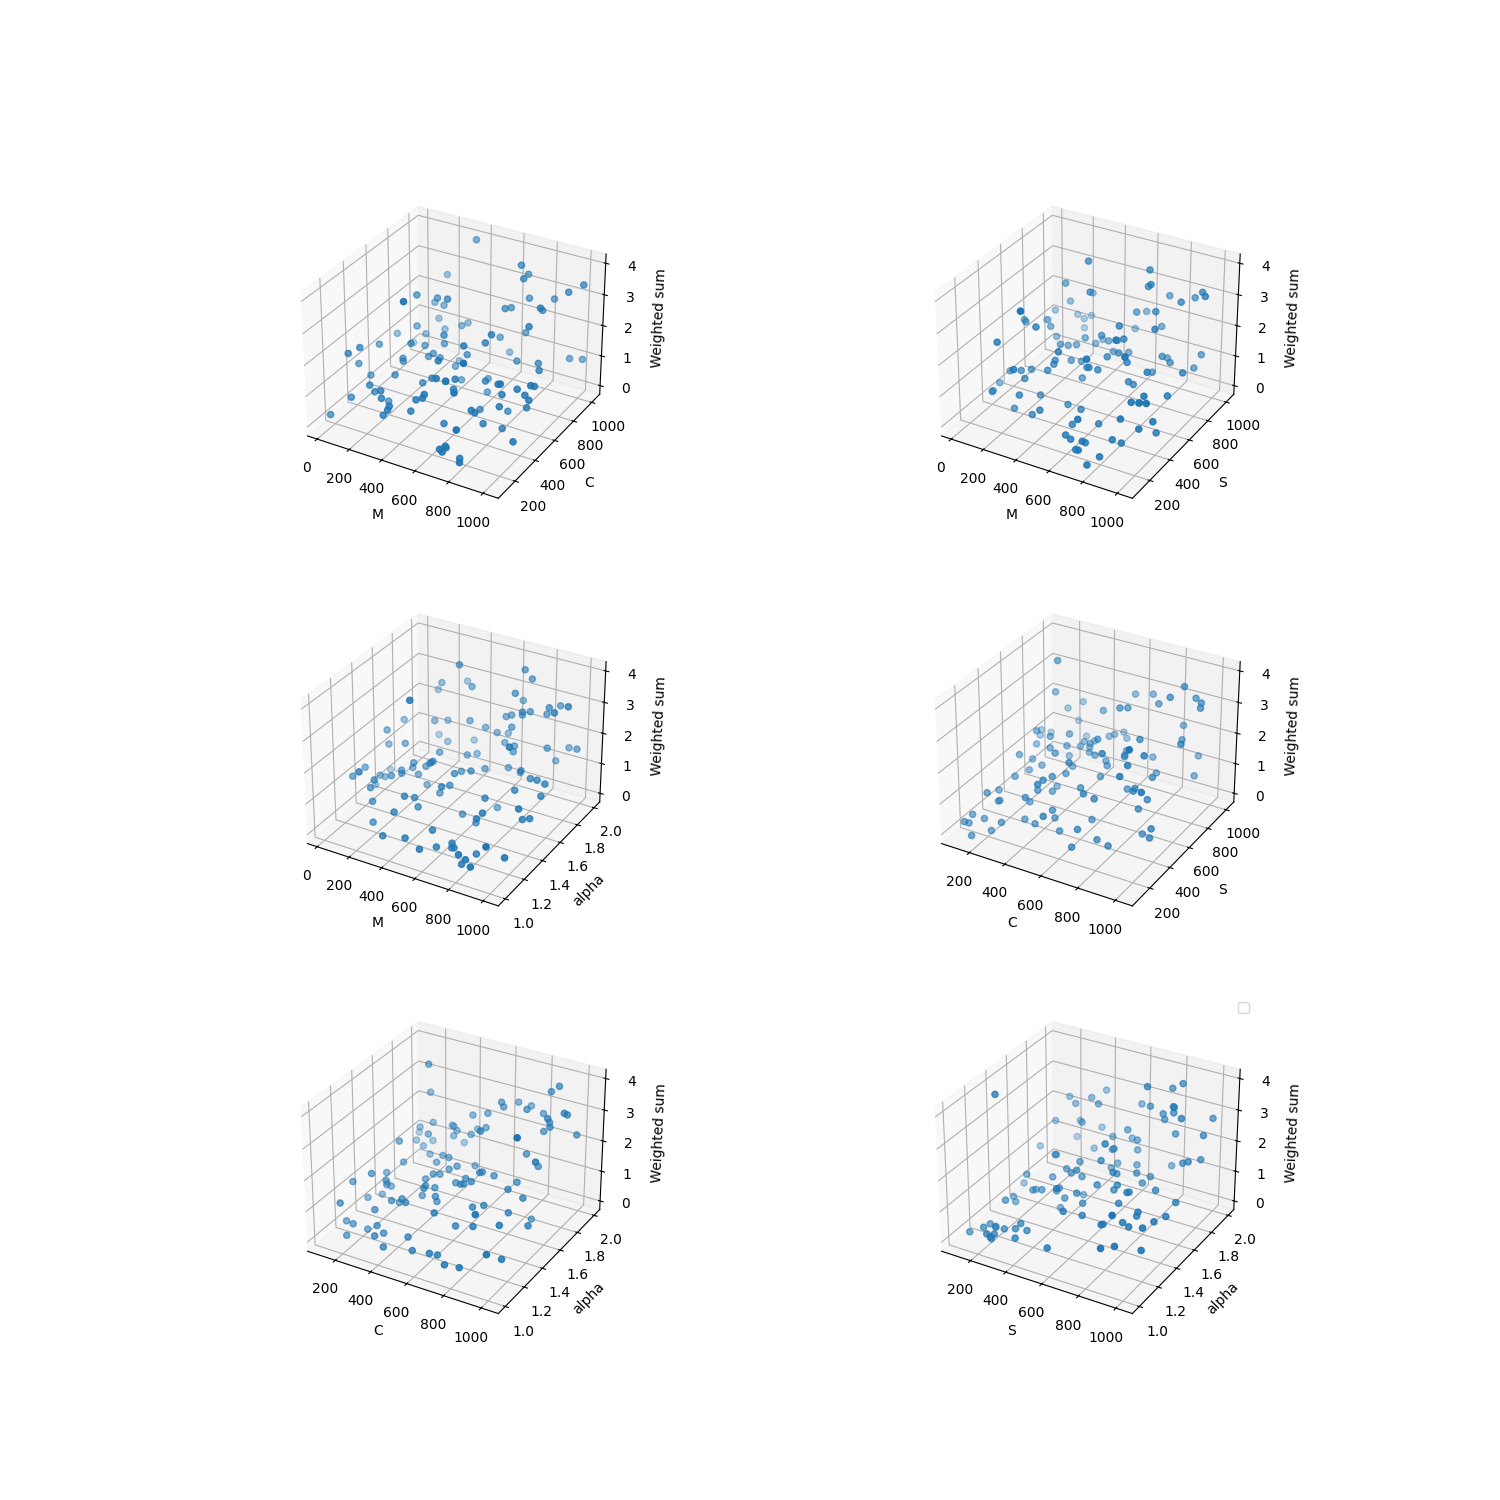

M    C    S     alpha        ws
iter                                   
9     660  228  187  1.197888  0.000100
12    782  171  100  1.089803  0.004400
97    816  115  164  1.182919  0.114810
37     12  146  396  1.486909  0.203098
13    701  172  214  1.151944  0.208889
34    714  115  126  1.589238  0.277881
62    633  680  183  1.089097  0.308282
79    877  424  272  1.013995  0.314123
8      17  914  449  1.633406  0.318306
47    696  119  192  1.389349  0.320597

In [12]:
sift_results = pd.read_csv('bo-small-221.csv').set_index("iter")
fig = plt.figure(figsize=(15, 15))

combs = [("M", "C"), ("M", "S"), ("M", "alpha"), ("C", "S"), ("C", "alpha"), ("S", "alpha")]
for i, com in enumerate(combs):
    c1, c2 = com
    axes = fig.add_subplot(3, 2, i+1, projection='3d')
    axes.scatter3D(sift_results[c1], sift_results[c2], sift_results["ws"])
    axes.set_xlabel(c1)
    axes.set_ylabel(c2)
    axes.set_zlabel('Weighted sum')

plt.legend()
plt.show()

plt.savefig('./images/report/ws-bo-221.png')

sift_results.sort_values(by="ws")[:10]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


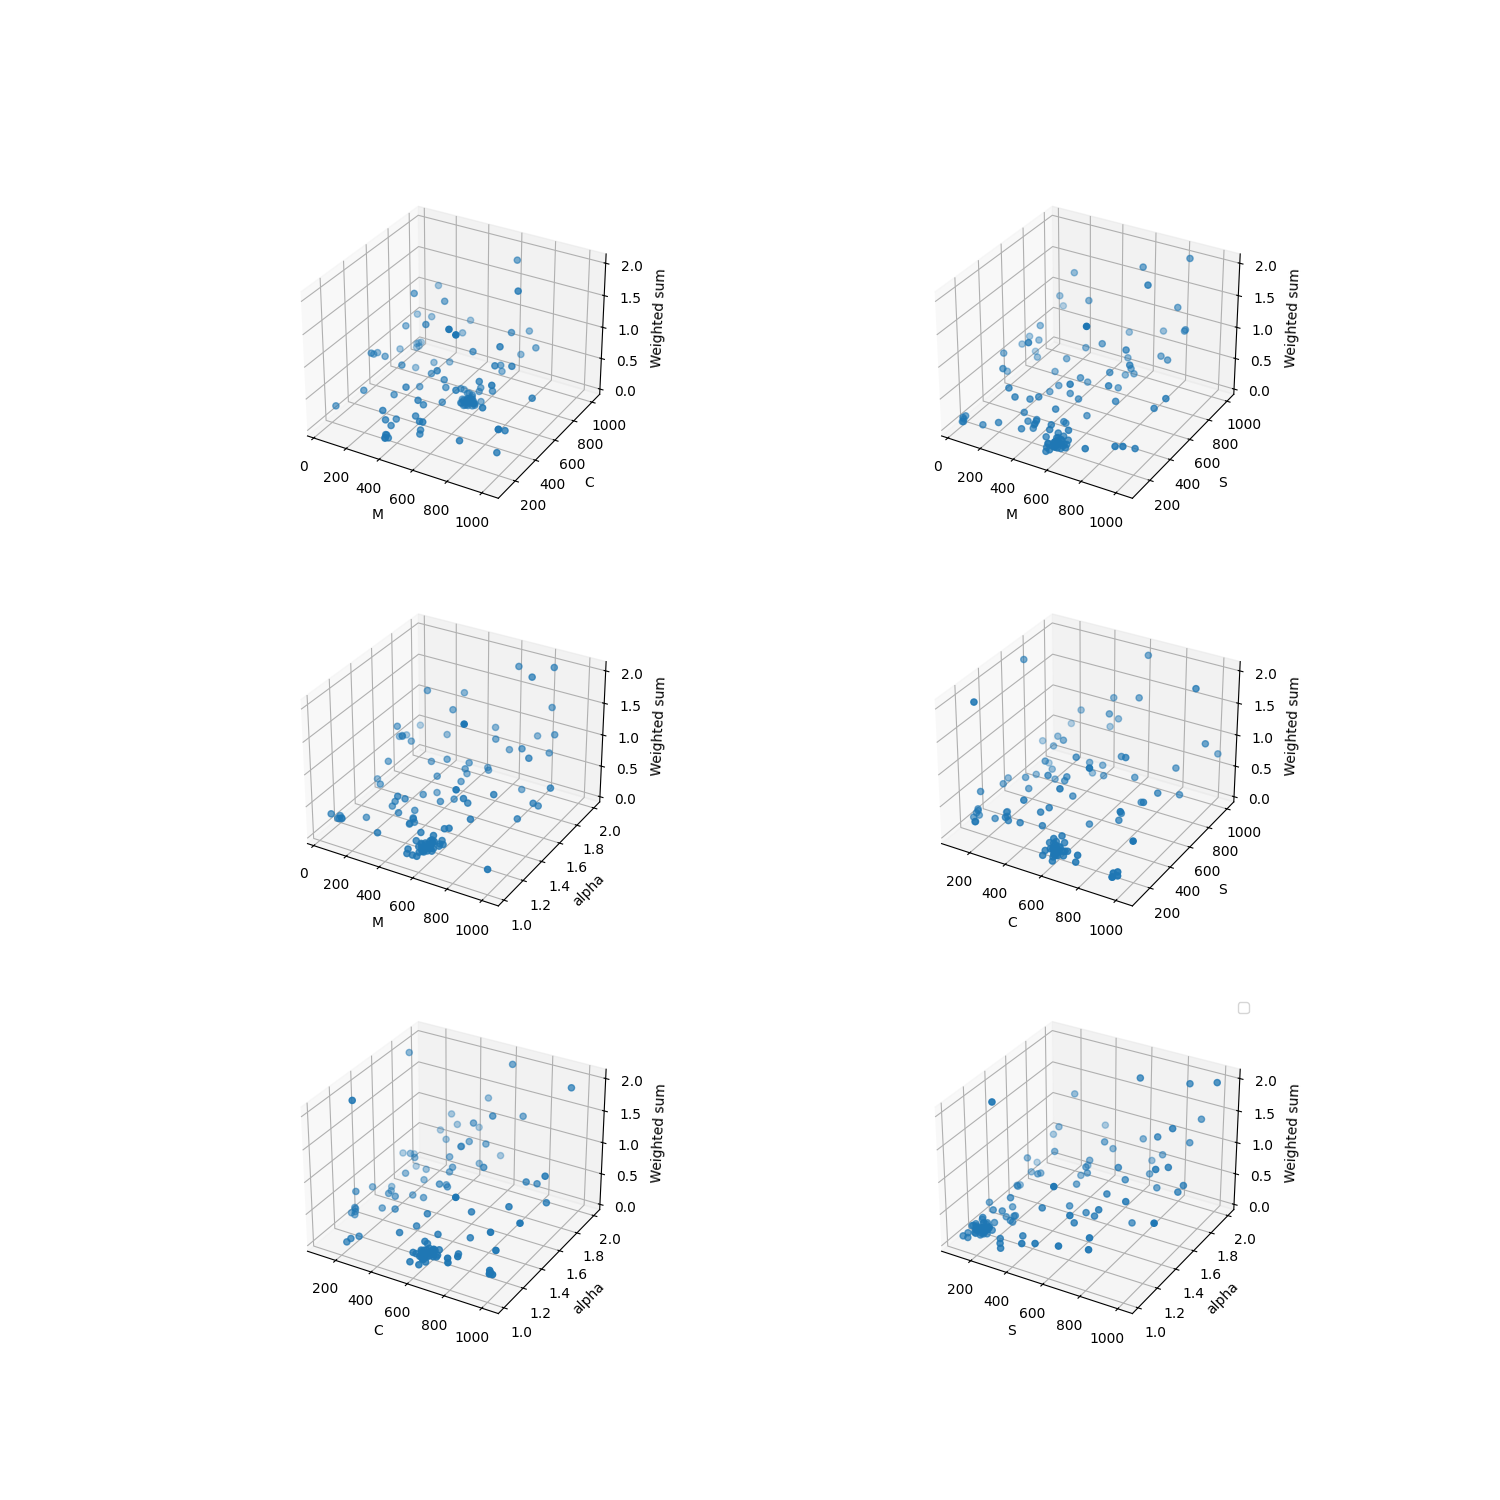

M    C    S     alpha        ws
iter                                   
16    568  598  159  1.104854  0.055824
11    600  602  182  1.131278  0.057382
25    552  621  100  1.085884  0.065404
89    539  609  126  1.041355  0.076897
85    576  624  141  1.152214  0.087340
23    589  578  178  1.104949  0.090227
84     39  937  109  1.151568  0.093604
5     613  606  142  1.190785  0.095284
94    570  565  105  1.032839  0.096421
30    596  620  135  1.128348  0.101458

In [13]:
sift_results = pd.read_csv('bo-small-112.csv').set_index("iter")
fig = plt.figure(figsize=(15, 15))

combs = [("M", "C"), ("M", "S"), ("M", "alpha"), ("C", "S"), ("C", "alpha"), ("S", "alpha")]
for i, com in enumerate(combs):
    c1, c2 = com
    axes = fig.add_subplot(3, 2, i+1, projection='3d')
    axes.scatter3D(sift_results[c1], sift_results[c2], sift_results["ws"])
    axes.set_xlabel(c1)
    axes.set_ylabel(c2)
    axes.set_zlabel('Weighted sum')

plt.legend()
plt.show()

plt.savefig('./images/report/ws-bo-112.png')

sift_results.sort_values(by="ws")[:10]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


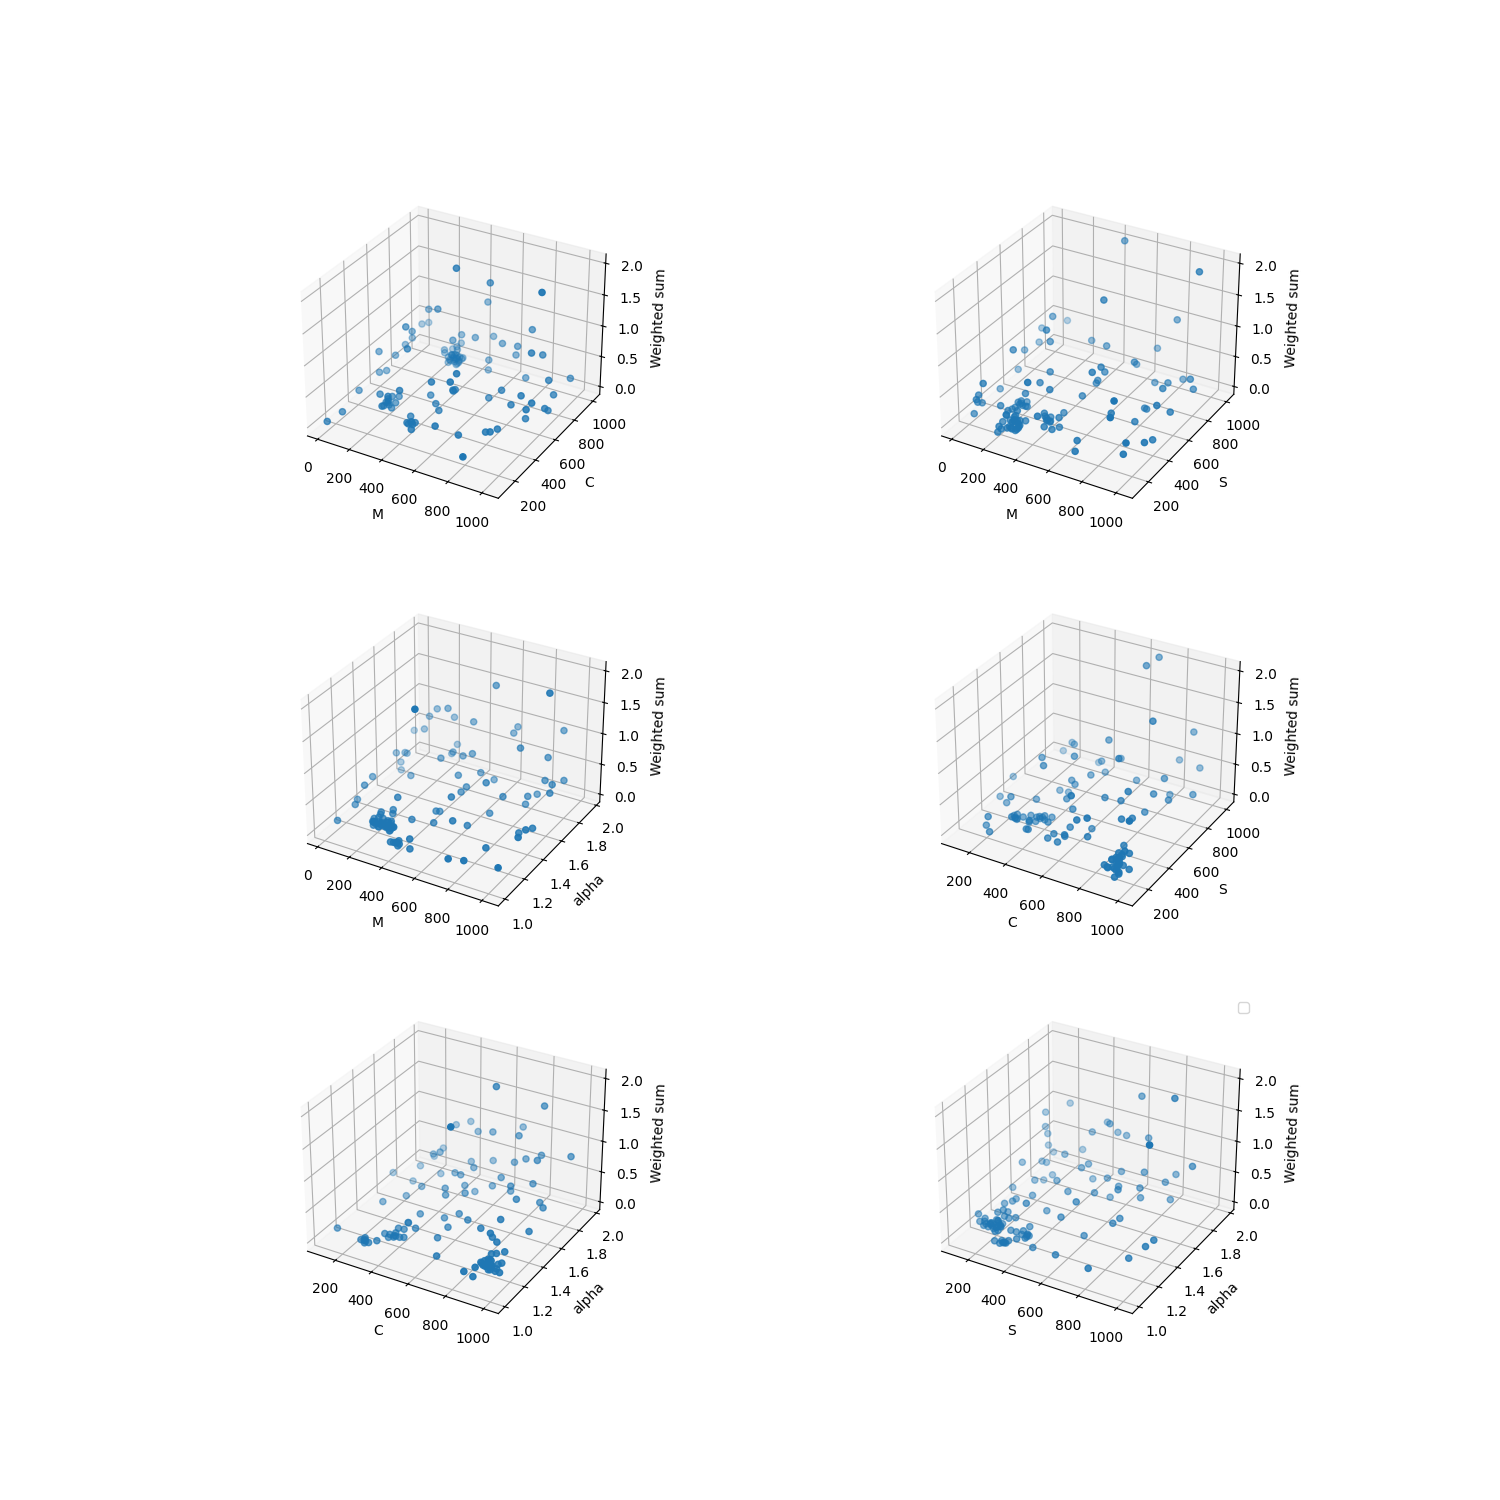

M    C    S     alpha        ws
iter                                   
10    294  899  225  1.173432  0.014431
11    295  908  198  1.176635  0.018637
28    209  385  386  1.173622  0.059893
66     13  111  461  1.102408  0.062545
52    422  290  331  1.069600  0.063003
32    238  366  387  1.157287  0.063207
22    237  945  156  1.154125  0.064826
20    263  892  192  1.171215  0.065713
9     277  929  227  1.214441  0.067455
27    231  413  383  1.183549  0.068332

In [14]:
sift_results = pd.read_csv('bo-small-111.csv').set_index("iter")
fig = plt.figure(figsize=(15, 15))

combs = [("M", "C"), ("M", "S"), ("M", "alpha"), ("C", "S"), ("C", "alpha"), ("S", "alpha")]
for i, com in enumerate(combs):
    c1, c2 = com
    axes = fig.add_subplot(3, 2, i+1, projection='3d')
    axes.scatter3D(sift_results[c1], sift_results[c2], sift_results["ws"])
    axes.set_xlabel(c1)
    axes.set_ylabel(c2)
    axes.set_zlabel('Weighted sum')

plt.legend()
plt.show()

plt.savefig('./images/report/ws-bo-111.png')

sift_results.sort_values(by="ws")[:10]